In [1]:
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt


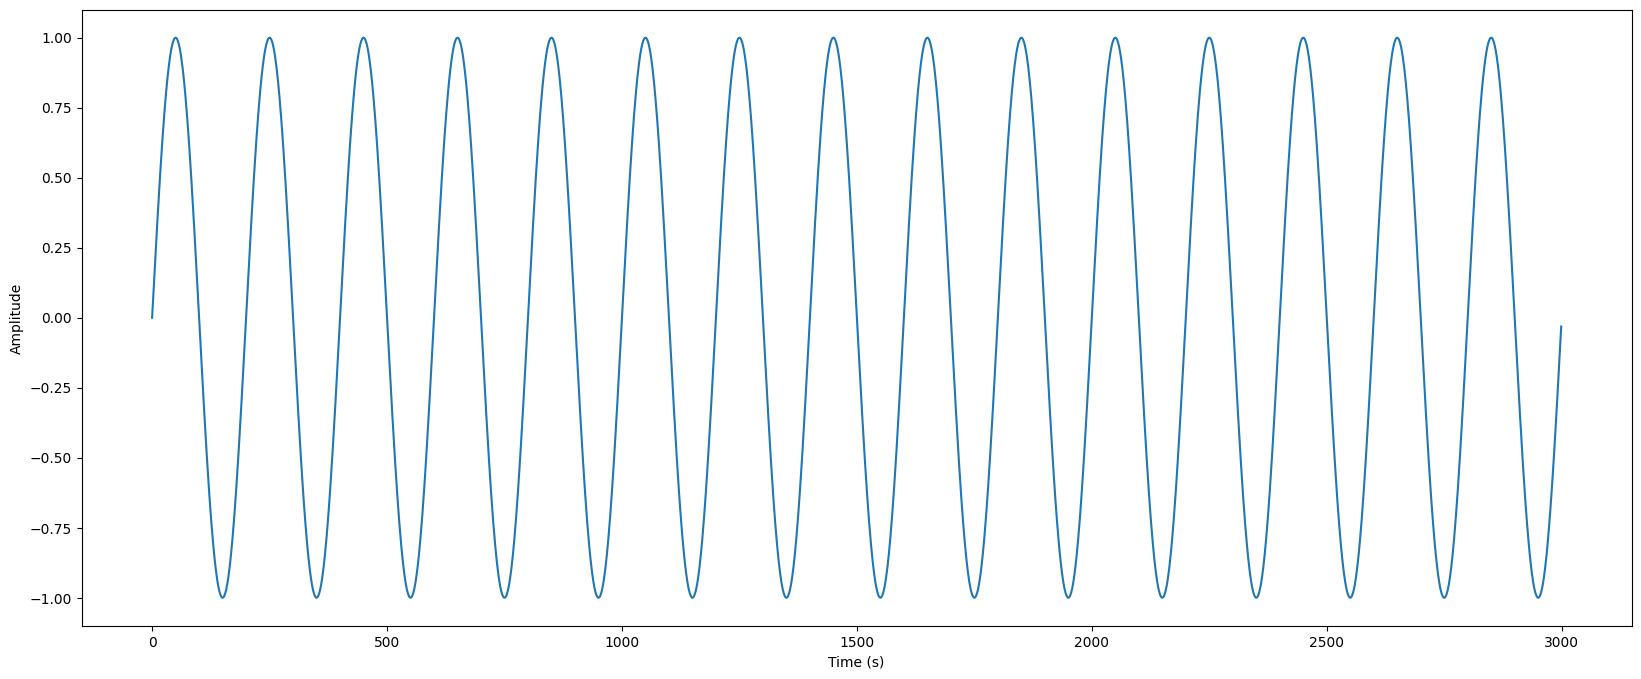

In [16]:
# 設定波形參數
amplitude = 1  # 振幅
frequency = 5  # 頻率
phase = 0      # 相位
duration = 3   # 時間長度，單位為秒
sampling_rate = 1000  # 取樣率，單位為 Hz

# 計算波形數據
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
waveform = amplitude * np.sin(2 * np.pi * frequency * time + phase)

# 繪製波形圖
plt.figure(figsize=(20, 8))
plt.plot(waveform)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [3]:
# harmonics = {}

# # get data_stock's infomation
# data = waveform
# array_data = np.array(data)
# n_data = array_data.size
# time_data = np.arange(0, n_data)

# # detrend data
# # find linear trend in data
# Polynomial = np.polyfit(time_data, array_data, 1)
# data_notrend = array_data - Polynomial[0] * time_data    # detrended x
# # data_notrend = array_data

# # Phase correction
# data_notrend_phase = np.unwrap(np.angle(np.fft.fft(data_notrend)))

# # fft process
# data_freqdom = np.fft.fft(data_notrend, n=n_data)
# frequence = np.fft.fftfreq(n=n_data, d=1)
# f_positive = frequence[np.where(frequence > 0)]
# data_freqdom_positive = data_freqdom[np.where(frequence > 0)]

# # sort indexes
# indexes = list(range(f_positive.size))      # frequencies
# # sort method 1
# # indexes.sort(key = lambda i: np.absolute(frequence[i]))     # sort indexes by frequency, lower -> higher
# # sort method 2 :
# # sort indexes by amplitudes, lower -> higher
# indexes.sort(key=lambda i: np.absolute(data_freqdom[i]))
# indexes.reverse()       # sort indexes by amplitudes, higher -> lower

# # get data_all_time'size
# time_transfer = np.arange(0, f_positive.size*2)
# count = 0
# # get harmonics
# for j in indexes:
#     if count < 1:
#         # ampli = np.abs(data_freqdom)     # amplitude
#         X_abs = np.abs(data_freqdom)
#         phase = np.angle(data_freqdom_positive[j])      # phase correction
#         X_complex = X_abs*phase
#         harmonics[j] = X_abs * np.sin(2 * np.pi * frequency * time + phase)
#         print(j)
#         print(phase)
        
#         count+=1
#     else:
#         break


In [4]:
# fig, axes = plt.subplots(3, 1, figsize=(30, 8), sharex=False)
# axes[0].plot(waveform)
# axes[0].set_xlim(-10, 1000)
# axes[1].plot(harmonics[5])
# axes[1].set_xlim(-10, 1000)
# axes[2].plot(frequence, X_abs)
# axes[2].set_xlim(0, 10)

In [5]:
# get data_stock's infomation
data = waveform
array_data = np.array(data)
n_data = array_data.size
time_data = np.arange(0, n_data)

# detrend data
# find linear trend in data
Polynomial = np.polyfit(time_data, array_data, 1)
data_notrend = array_data - Polynomial[0] * time_data    # detrended x

# fft process
data_freqdom = fft.fft(data_notrend, n=n_data)
frequence = fft.fftfreq(n=n_data, d=1)
f_positive = frequence[np.where(frequence > 0)]
data_freqdom_positive = data_freqdom[np.where(frequence > 0)]

# sort indexes
indexes = list(range(f_positive.size))      # frequencies
# sort method 1
# indexes.sort(key = lambda i: np.absolute(frequence[i]))     # sort indexes by frequency, lower -> higher
# sort method 2 :
# sort indexes by amplitudes, lower -> higher
indexes.sort(key=lambda i: np.absolute(data_freqdom[i]))
indexes.reverse()       # sort indexes by amplitudes, higher -> lower

# get data_all_time'size
time_transfer = np.arange(0, n_data)
count = 0
harmonics = {}
# get harmonics
for j in indexes:
    if count < 5:
        ampli = np.abs(
            data_freqdom_positive[j]) / n_data     # amplitude
        phase = np.angle(data_freqdom_positive[j])      # phase correction
        harmonics[j] = ampli * \
            np.cos(2 * np.pi * f_positive[j] * time_transfer + phase)

        print(j)
        count+=1


5
0
1
2
3


(-10.0, 1000.0)

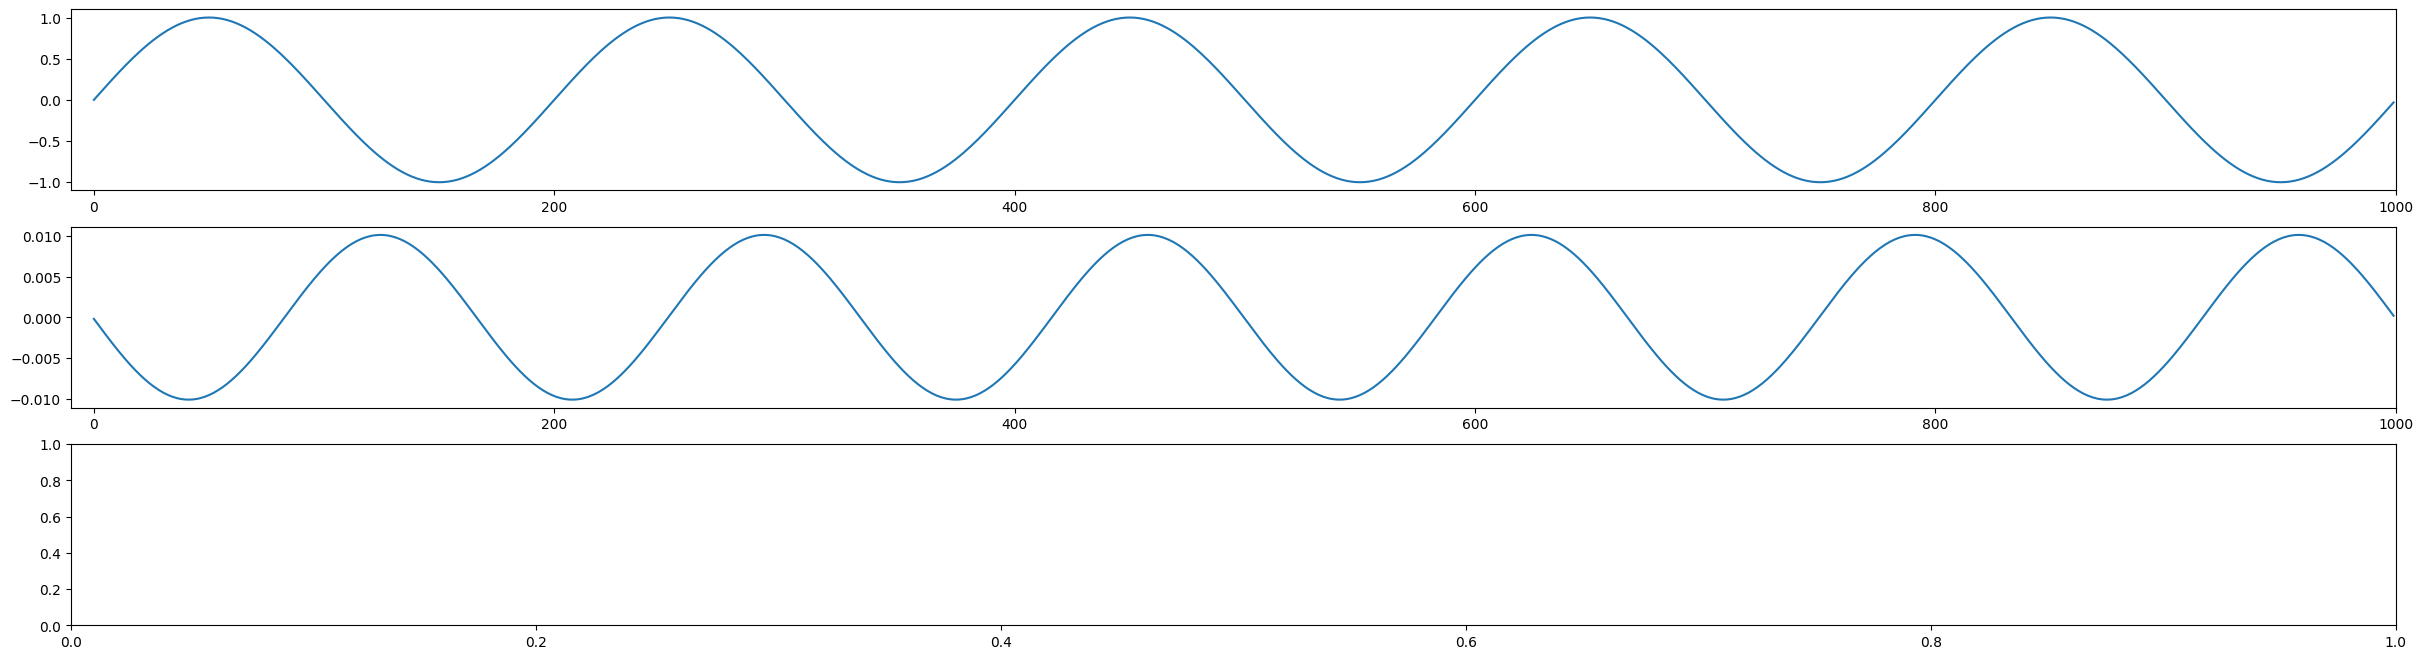

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(30, 8), sharex=False)
axes[0].plot(waveform)
axes[0].set_xlim(-10, 1000)
axes[1].plot(harmonics[5])
axes[1].set_xlim(-10, 1000)
# axes[2].plot(frequence, ampli)
# axes[2].set_xlim(0, 10)

In [3]:
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt


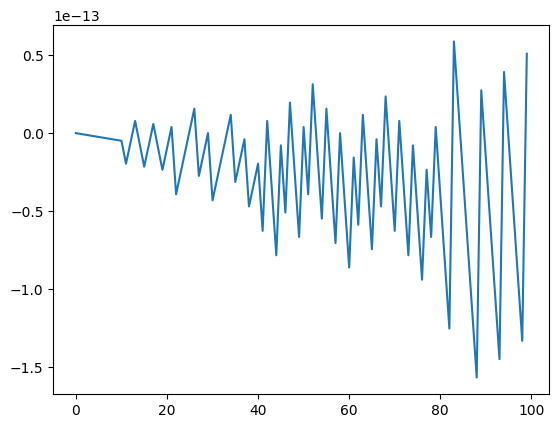

In [7]:
import numpy as np
from scipy.interpolate import interp1d

# 設定原始波形的頻率和長度
freq = 2
length = 100

# 產生原始波形
time = np.arange(length)
waveform = np.sin(2 * np.pi * freq * time)

# 設定所需的新長度
new_length = 20

# 產生新的時間序列，包含所需的新長度
new_time = np.linspace(0, length - 1, new_length)

# 執行線性插值，將原始波形擴充至新的長度
f = interp1d(time, waveform, kind='linear')
new_waveform = f(new_time)

# 顯示新波形
plt.plot(time, waveform)
# plt.plot(new_time, new_waveform)
